<a href="https://colab.research.google.com/github/Insulin-bangkit-2022/deeplearningmethod/blob/main/Capstone_Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import pickle
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from keras.models import load_model
%matplotlib inline

**Import Diabetes Dataset from Kaggle**

Diabetes dataset is taken from kaggle and put in the team's github repository

In [ ]:
data = pd.read_csv('diabetes_data.csv', delimiter = ';')
data

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [ ]:
print (data.shape)

(520, 17)


Changing gender (string) to int

In [ ]:
data["gender"] = data["gender"].apply({"Male":1, "Female":0}.get)
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


Checking null in the data

In [ ]:
data.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

Check whether the dataset is balance or not

1    320
0    200
Name: class, dtype: int64

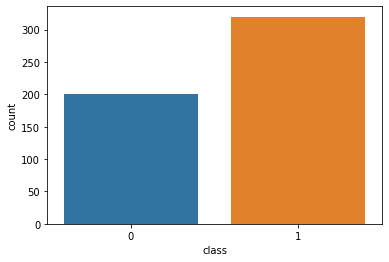

In [ ]:
sns.countplot(x="class", data = data)
data['class'].value_counts()

1    328
0    192
Name: gender, dtype: int64

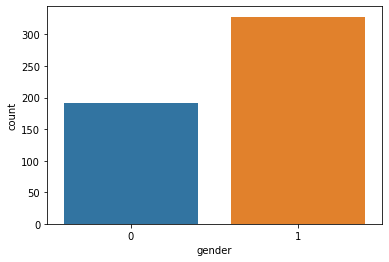

In [ ]:
sns.countplot(x="gender", data = data)
data['gender'].value_counts()

**Balance Dataset**

The dataset is imbalance. We upsample the minority data to match the majority data

In [ ]:
#create two different dataframe of majority and minority class 
data_majority = data[(data['class']==1)] 
data_minority = data[(data['class']==0)] 
# upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=320, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_minority_upsampled, data_majority])

Checking balance of the dataset after upsampling

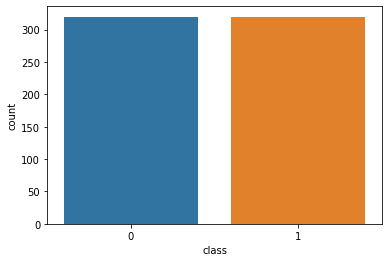

In [ ]:
data_upsampled['class'].value_counts()
sns.countplot(x="class", data = data_upsampled)

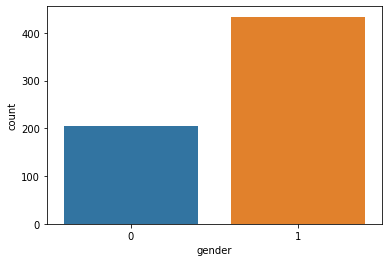

In [ ]:
data_upsampled['gender'].value_counts()
sns.countplot(x="gender", data = data_upsampled)

In [ ]:
#updating the data with upsampled data
data = data_upsampled

**Plotting Heat Map**

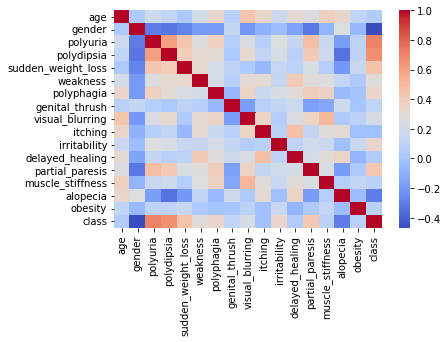

In [ ]:
tc = data.corr()
sns.heatmap(tc,annot = False,cmap="coolwarm")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 335 to 517
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 640 non-null    int64
 1   gender              640 non-null    int64
 2   polyuria            640 non-null    int64
 3   polydipsia          640 non-null    int64
 4   sudden_weight_loss  640 non-null    int64
 5   weakness            640 non-null    int64
 6   polyphagia          640 non-null    int64
 7   genital_thrush      640 non-null    int64
 8   visual_blurring     640 non-null    int64
 9   itching             640 non-null    int64
 10  irritability        640 non-null    int64
 11  delayed_healing     640 non-null    int64
 12  partial_paresis     640 non-null    int64
 13  muscle_stiffness    640 non-null    int64
 14  alopecia            640 non-null    int64
 15  obesity             640 non-null    int64
 16  class               640 non-null    int64


**Split the Dataset Into Training and Test Set**

In [ ]:
x = data.drop("class", axis=1)
y = data["class"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15,random_state = 10)
print(x_train)
print(y_train)

     age  gender  polyuria  polydipsia  sudden_weight_loss  weakness  \
63    60       0         1           0                   1         1   
471   57       1         0           0                   0         0   
430   32       1         0           0                   0         0   
377   40       1         0           0                   1         0   
408   59       0         0           0                   0         1   
..   ...     ...       ...         ...                 ...       ...   
49    46       0         1           0                   1         1   
0     40       1         0           1                   0         1   
256   50       0         1           1                   0         1   
247   53       1         0           0                   0         1   
314   43       1         0           0                   1         0   

     polyphagia  genital_thrush  visual_blurring  itching  irritability  \
63            0               1                1        1   

In [ ]:
x.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
335,53,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0
492,64,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0
325,43,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0
214,47,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
349,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Training Dataset**

We build and train our diabetes dataset using Deep Neural Network

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dropout(0.2, input_dim = 16),
  tf.keras.layers.Dense(units = 300, activation = "relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units = 200, activation = "relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units = 100, activation = "relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units = 1, activation = "sigmoid"),
  ])

model.compile(optimizer = "Adam", 
              loss = "binary_crossentropy" , 
              metrics=["accuracy"])

#Here we train our model.
history = model.fit(x_train, y_train, epochs=100, validation_data = (x_test,y_test))

#This the inference phase.We try our model on test data.
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

Epoch 1/100
17/17 [==============================] - 1s 13ms/step - loss: 1.0259 - accuracy: 0.5312 - val_loss: 0.7438 - val_accuracy: 0.4792
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.7906 - accuracy: 0.5717 - val_loss: 0.6809 - val_accuracy: 0.4792
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.7183 - accuracy: 0.5772 - val_loss: 0.6953 - val_accuracy: 0.5208
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6176 - val_loss: 0.6884 - val_accuracy: 0.4792
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6352 - accuracy: 0.6121 - val_loss: 0.6709 - val_accuracy: 0.5417
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6150 - accuracy: 0.6324 - val_loss: 0.6608 - val_accuracy: 0.7604
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5847 - accuracy: 0.6507 - val_loss: 0.6468 - val_accuracy: 0.8958
Epoch 8/100


In [ ]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.1025 - accuracy: 0.9688


[0.10253047198057175, 0.96875]

**Plot Accuracy and Loss**

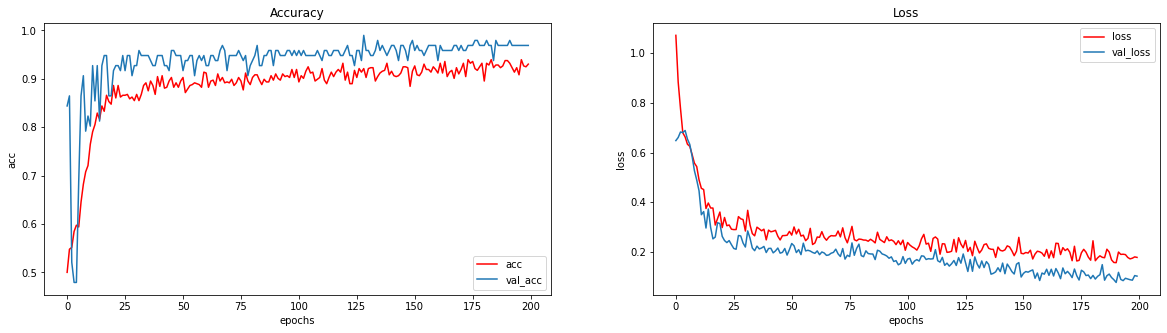

In [ ]:
# Retrieve a list of list results on training and test data sets for each training epoch

acc      = history.history[ 'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]


fig, axes = plt.subplots(1,2,figsize=(20,5))
#Plot accuracy
axes[0].plot(acc, color='red')
axes[0].plot(val_acc)
axes[0].set_title('Accuracy')
axes[0].set_xlabel('epochs')
axes[0].set_ylabel('acc')
axes[0].legend(['acc', 'val_acc'], loc='lower right')
#Plot loss
axes[1].plot(loss, color='red')
axes[1].plot(val_loss)
axes[1].set_title('Loss')
axes[1].set_xlabel('epochs')
axes[1].set_ylabel('loss')
axes[1].legend(['loss', 'val_loss'], loc='upper right')

**Plotting Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[50  0]
 [ 3 43]]


0.96875

In [ ]:
def normalized_confusion_matrix(y_test, conf_mat, model):
    _ , counts = np.unique(y_test,return_counts=True)
    conf_mat = conf_mat/counts
    plt.figure(figsize=(6,5))
    ax=sns.heatmap(conf_mat,fmt='.2f',annot=True,annot_kws={'size':20},lw=2, cbar=True, cbar_kws={'label':'% Class accuracy'})
    plt.title(f'Confusion Matrix ({model})',size=22)
    plt.xticks(size=20)
    plt.yticks(size=20)
    ax.figure.axes[-1].yaxis.label.set_size(20) ##colorbar label
    cax = plt.gcf().axes[-1]  ##colorbar ticks
    cax.tick_params(labelsize=20) ## colorbar ticks
    plt.savefig(f'confusion-matrix-{model}.png',dpi=300)

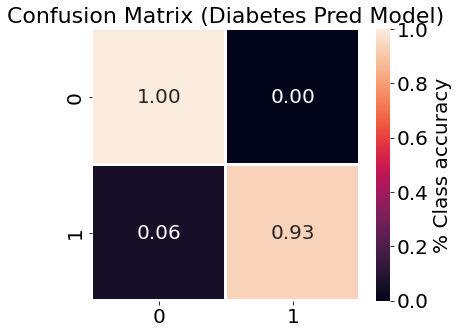

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat, 'Diabetes Pred Model')

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_24 (Dropout)        (None, 16)                0         
                                                                 
 dense_24 (Dense)            (None, 300)               5100      
                                                                 
 dropout_25 (Dropout)        (None, 300)               0         
                                                                 
 dense_25 (Dense)            (None, 200)               60200     
                                                                 
 dropout_26 (Dropout)        (None, 200)               0         
                                                                 
 dense_26 (Dense)            (None, 100)               20100     
                                                                 
 dropout_27 (Dropout)        (None, 100)              

In [ ]:
#print(tf.__version__)
#print(model.predict([30, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

**Save the Model**

In [ ]:
tf.saved_model.save(
    model,
    export_dir = "/tmp/myModel",
)

INFO:tensorflow:Assets written to: /tmp/myModel/assets


In [ ]:
model.save('/tmp/myModel/model.h5')

In [ ]:
pickle.dump(model,open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://5172d3cb-201c-4b99-b2b8-55c6b8cb91fe/assets


In [ ]:
model = pickle.load(open('model.pkl','rb'))